<a href="https://colab.research.google.com/github/Z-Wenh/Data_Tools/blob/main/DatatToolsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
#The dataset I will be using can be found here: https://www.kaggle.com/datasets/mexwell/student-scores/data
#It has been uploaded to github and the csv file will be loaded from that domain.
#This is a dataset that stores information about the performance of senior students at some high school.
#columns named 'id' and 'email' from the csv file will be dropped because they are insignificant to the analysis of this dataset.

df = pd.read_csv("https://raw.githubusercontent.com/Z-Wenh/Data_Tools/main/student-scores.csv")
student_df = df.drop(columns = ['id', 'email', 'first_name', 'last_name'])
student_df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [ ]:
#Originally with 17 columns, it is now 13 columns after filtering out the id column, student email, first name, and last name columns.
#This is a dataset containing 2000 rows by 15 columns. There are no NaN/missing values in this dataset.

student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      2000 non-null   object
 1   part_time_job               2000 non-null   bool  
 2   absence_days                2000 non-null   int64 
 3   extracurricular_activities  2000 non-null   bool  
 4   weekly_self_study_hours     2000 non-null   int64 
 5   career_aspiration           2000 non-null   object
 6   math_score                  2000 non-null   int64 
 7   history_score               2000 non-null   int64 
 8   physics_score               2000 non-null   int64 
 9   chemistry_score             2000 non-null   int64 
 10  biology_score               2000 non-null   int64 
 11  english_score               2000 non-null   int64 
 12  geography_score             2000 non-null   int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 17

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


<Axes: >

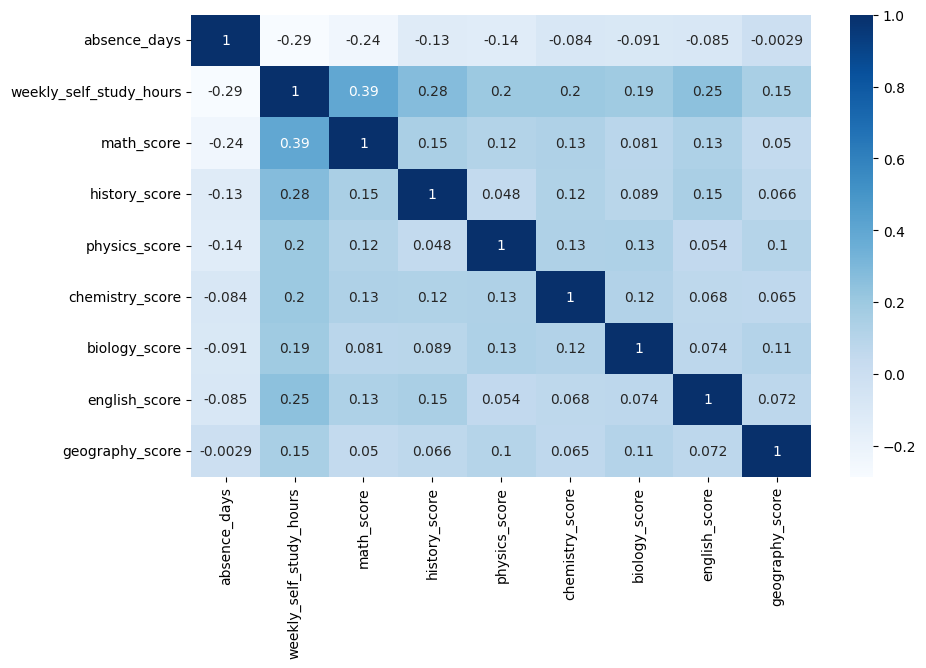

In [ ]:
#Numeric variables:
#absence_days, weekly_self_Study_hours, math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score

df_numeric = student_df[['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']]
display(df_numeric.describe())

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), cmap="Blues", annot=True)

#   - There is a weak negative correlation between absense days and weekly self study hours.
#     This can indicate that students who are usually absent, tends to have lower self study hours per week, or does not indulge in the act of studying.
#   - There is a slightly positive correlation between weekly self study hours and each of the course grades.
#     This can mean that as the students put in more hours into self studying, the better the results/grades they will achieve in each of the courses.

In [ ]:
#Categorical variables:
#gender, part_time_job, extracurricular_activities, career_aspiration

cat_df = student_df[['gender', 'part_time_job', 'extracurricular_activities', 'career_aspiration']]
print(student_df['gender'].value_counts(), "\n")
print(student_df['part_time_job'].value_counts(), "\n")
print(student_df['extracurricular_activities'].value_counts(), "\n")
print(student_df['career_aspiration'].value_counts())


gender
female    1002
male       998
Name: count, dtype: int64 

part_time_job
False    1684
True      316
Name: count, dtype: int64 

extracurricular_activities
False    1592
True      408
Name: count, dtype: int64 

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64


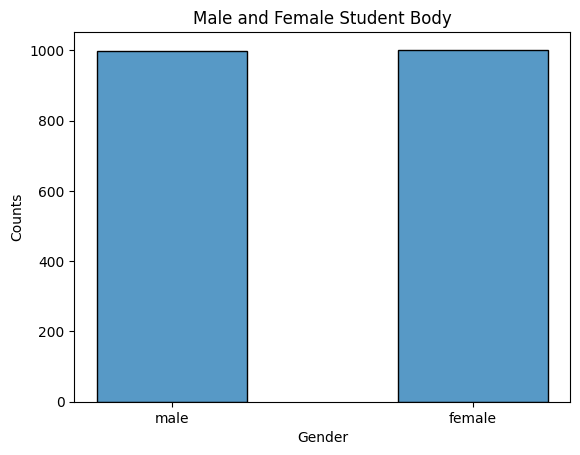

In [ ]:
sns.histplot(cat_df['gender'], shrink = 0.5)
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Male and Female Student Body")
plt.show()

count                  2000
unique                   17
top       Software Engineer
freq                    315
Name: career_aspiration, dtype: object


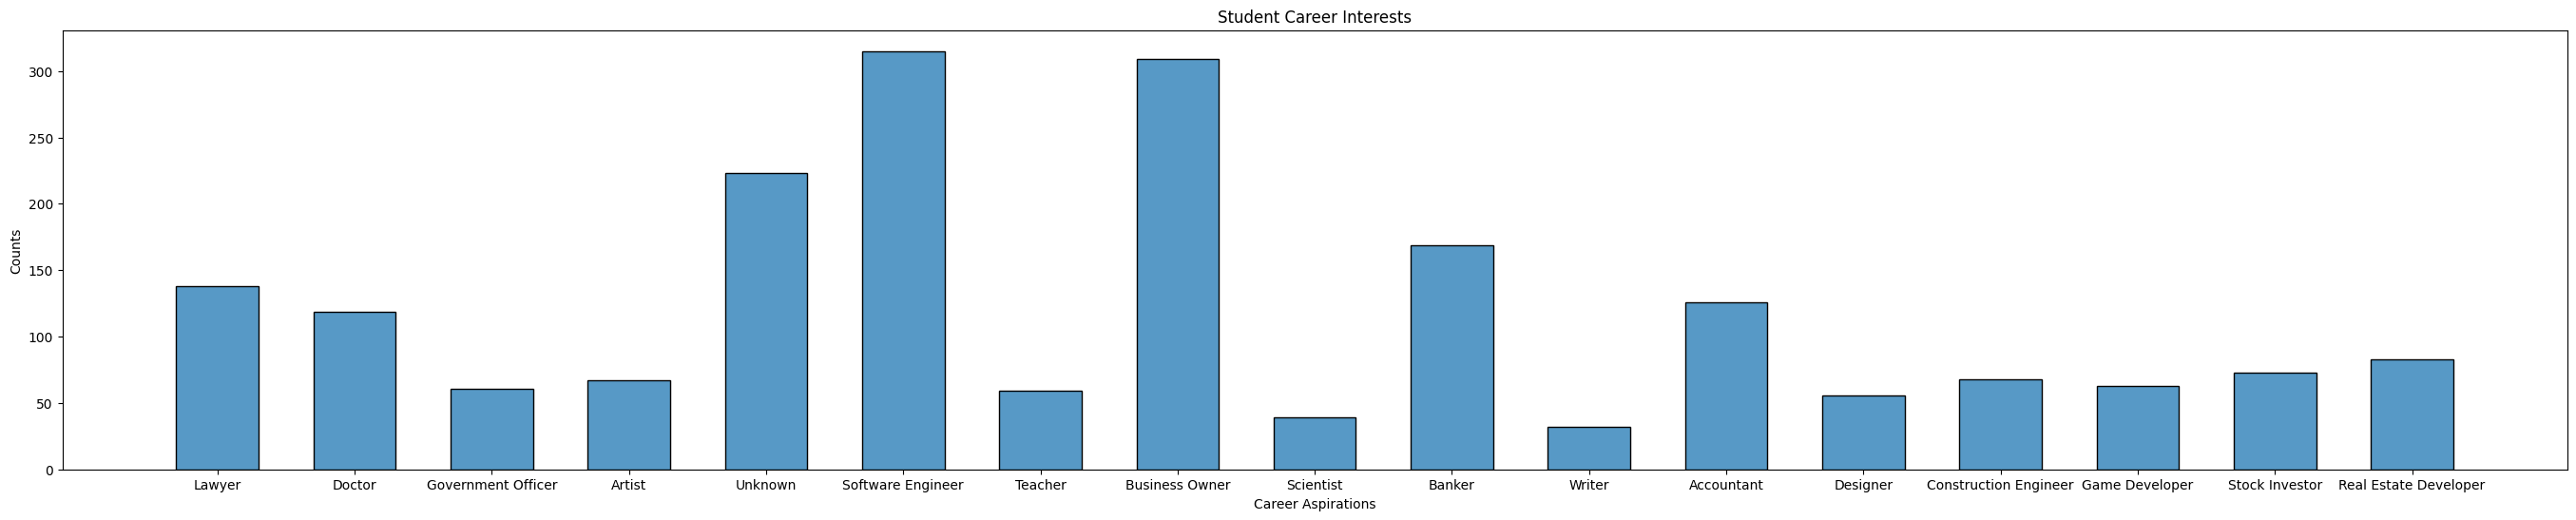

In [ ]:
print(student_df['career_aspiration'].describe())

plt.figure(figsize=(34, 6))
sns.histplot(cat_df['career_aspiration'], shrink = 0.6)
plt.xlabel("Career Aspirations")
plt.ylabel("Counts")
plt.title("Student Career Interests")
plt.show()

# High Level Analysis #1

**Null Hypothesis(H0)**: The amount of hours each student put into studying has no effect on their grade point average.

**Alternative Hypothesis(H1)**: There will be a linear relationship between the amount of hours each student put into studying and their grade point average.



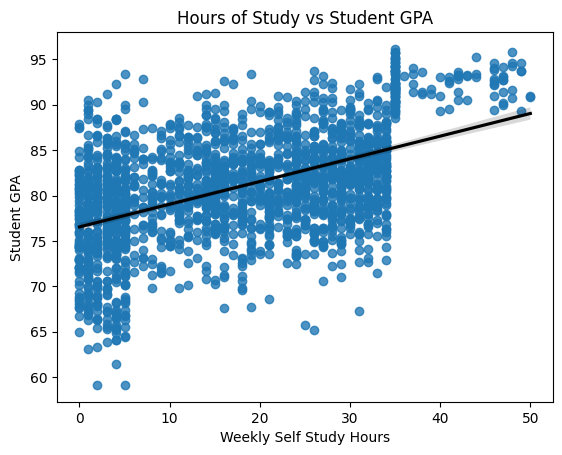

LinregressResult(slope=0.24982646933106795, intercept=76.54456326664936, rvalue=0.5015199798379675, pvalue=7.16718066726703e-128, stderr=0.009641440039002058, intercept_stderr=0.20730474988137024)


In [ ]:
#Preprocessing each student's GPA by computing the mean of each course grades
student_df['student_gpa'] = student_df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].mean(axis = 1)

#Constructing a linear regression graph to determine the relationship between the student's weekly study hours and their gpa for all of their classes.
sns.regplot(student_df, x= 'weekly_self_study_hours', y='student_gpa', line_kws={'color': 'black'})
plt.xlabel("Weekly Self Study Hours")
plt.ylabel("Student GPA")
plt.title("Hours of Study vs Student GPA")
plt.show()

study_hour_gpa_results = stats.linregress(student_df['weekly_self_study_hours'], student_df['student_gpa'])
print(study_hour_gpa_results)

#In regards to each student's weekly self study hours and their gpa,
#there is a moderate positive correlation. (r=0.50, p≈0)

#Utilizing the slope and y intercept, we can devise an equation: y = 0.2498x + 76.5446
#Using this equation, we can approximate a student's GPA for each additional hours of weekly study.
#For example, if a student were to study for 60 hours weekly, we can expect that student to have a GPA of 91.53

# High Level Analysis #2

Using pandas, show the number of students that have similar interests in career aspirations.

In [ ]:
#The groupby function will produce results in sorted order. head(1) will return the most popular career,
#and tail(1) will return the least popular career among the student body.
career_group = student_df.groupby('gender')['career_aspiration'].value_counts()
print(career_group)

gender  career_aspiration    
female  Business Owner           164
        Software Engineer        141
        Unknown                  109
        Banker                   103
        Lawyer                    66
        Accountant                64
        Teacher                   59
        Doctor                    53
        Real Estate Developer     45
        Artist                    42
        Designer                  32
        Government Officer        31
        Game Developer            31
        Stock Investor            25
        Scientist                 19
        Writer                    18
male    Software Engineer        174
        Business Owner           145
        Unknown                  114
        Lawyer                    72
        Construction Engineer     68
        Doctor                    66
        Banker                    66
        Accountant                62
        Stock Investor            48
        Real Estate Developer     38
        

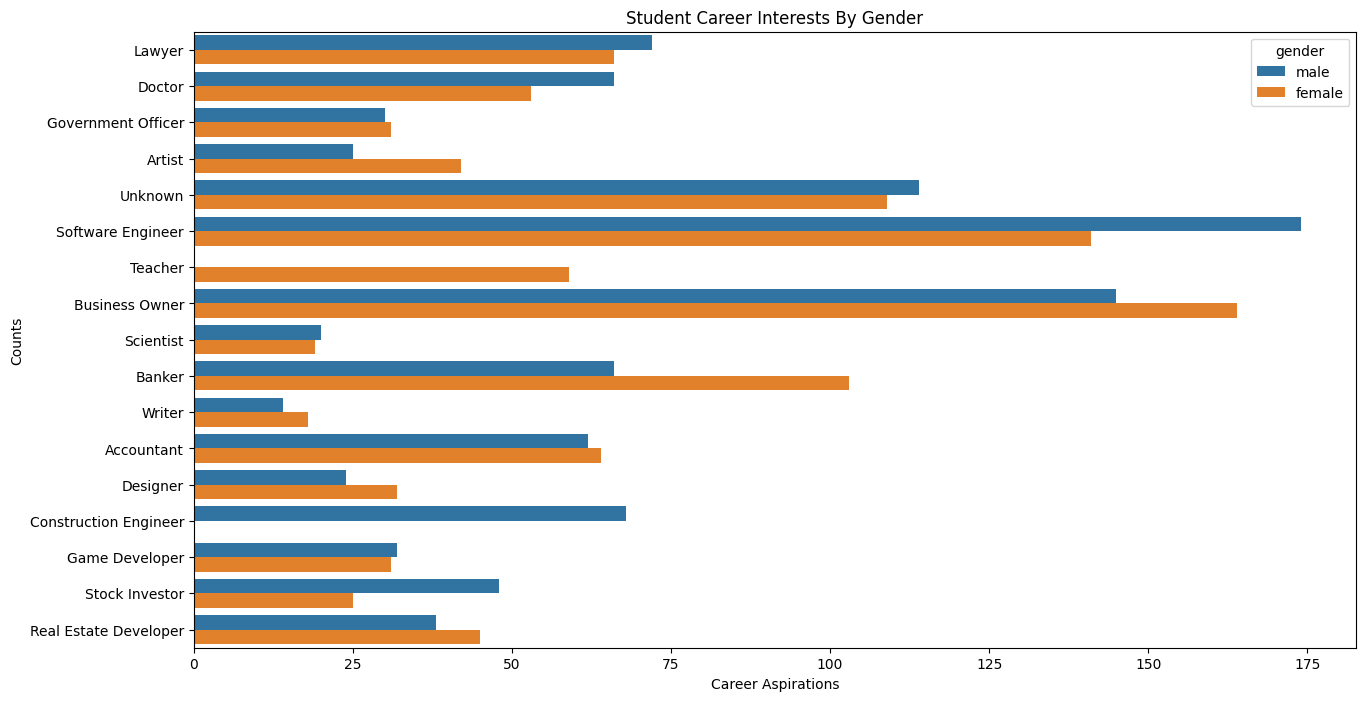

In [ ]:
#Majority of male students are interested in becoming software engineers.
#Majority of female students are interested in becoming business owners.
#No male students seem to be interested in becoming teachers
#No female students seem to be interested in becoming construction engineers.

plt.figure(figsize=(15, 8))
sns.countplot(student_df, y = 'career_aspiration', hue = 'gender')
plt.xlabel("Career Aspirations")
plt.ylabel("Counts")
plt.title("Student Career Interests By Gender")
plt.show()

In [ ]:
#Performing a Chi squared test
#Null hypothesis: There is no relationship between student gender and career aspiration
#Alternative hypothesis: There is a relationship between student gender and career aspiration

#We will be rejecting the null hypothesis based on the small pvalue. Based on the large statistic,
#we can say that there is a significant relationship between the student genders and career aspirations.
sex_contingence = pd.crosstab(student_df['gender'], student_df['career_aspiration'])
result = stats.chi2_contingency(sex_contingence)
print("\n", result)


 Chi2ContingencyResult(statistic=155.39466648000172, pvalue=6.718966009926925e-25, dof=16, expected_freq=array([[ 63.126,  33.567,  84.669, 154.809,  34.068,  28.056,  59.619,
         31.563,  30.561,  69.138,  41.583,  19.539, 157.815,  36.573,
         29.559, 111.723,  16.032],
       [ 62.874,  33.433,  84.331, 154.191,  33.932,  27.944,  59.381,
         31.437,  30.439,  68.862,  41.417,  19.461, 157.185,  36.427,
         29.441, 111.277,  15.968]]))


# High Level Analysis #3

This analysis tells us that a very low quantity of students, whether they're male or female, are willing to spend time outside of class to either work part time, or participate in extracurricular activities such as joining sports team, or joining school clubs.

We can also tell from grouping that there are less students working part time jobs than those participating in exatracurricular activities.

part_time_job,False,True
gender,,
female,835,167
male,849,149


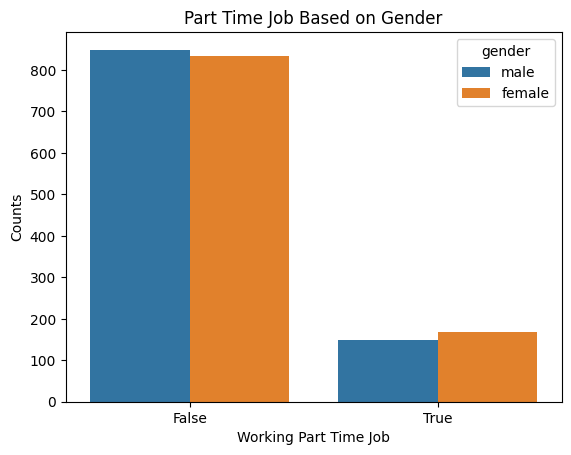

In [ ]:
part_timer = student_df.groupby('gender')['part_time_job'].value_counts().unstack()
display(part_timer)

sns.countplot(student_df, x = 'part_time_job', hue = 'gender')
plt.xlabel("Working Part Time Job")
plt.ylabel("Counts")
plt.title("Part Time Job Based on Gender")
plt.show()

extracurricular_activities,False,True
gender,,
female,795,207
male,797,201


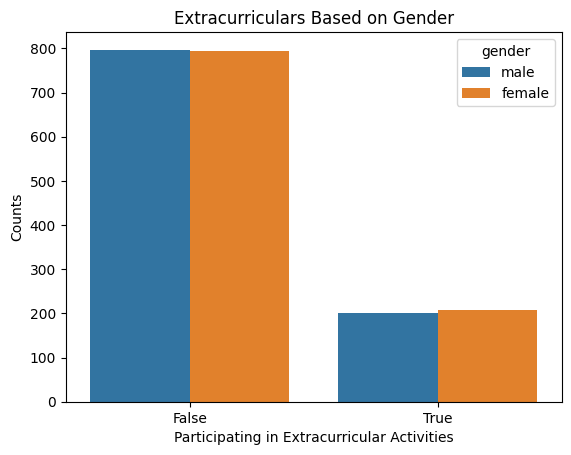

In [ ]:
extra_act = student_df.groupby('gender')['extracurricular_activities'].value_counts().unstack()
display(extra_act)

sns.countplot(student_df, x = 'extracurricular_activities', hue = 'gender')
plt.xlabel("Participating in Extracurricular Activities")
plt.ylabel("Counts")
plt.title("Extracurriculars Based on Gender")
plt.show()

# High Level Analysis #4


part_time_job  absence_days
False          0               109
               1               301
               2               312
               3               301
               4               170
               5               166
               6               102
               7               101
               8                32
               9                36
               10               54
True           0                14
               1                40
               2                32
               3                35
               4                29
               5                30
               6                34
               7                29
               8                19
               9                20
               10               34
Name: count, dtype: int64

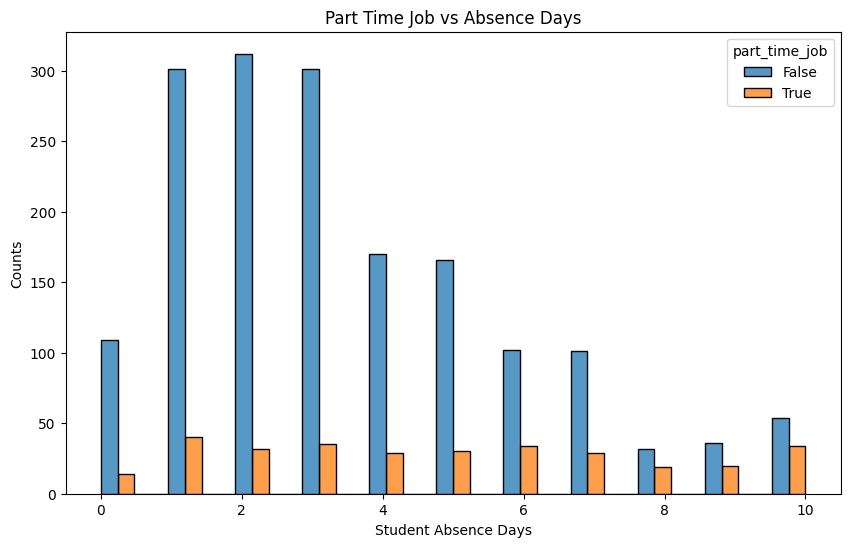

In [ ]:
display(student_df.groupby('part_time_job')['absence_days'].value_counts(sort = False))

plt.figure(figsize=(10, 6))
sns.histplot (student_df, x = 'absence_days', hue = 'part_time_job', multiple="dodge")
plt.xlabel("Student Absence Days")
plt.ylabel("Counts")
plt.title("Part Time Job vs Absence Days")
plt.show()

extracurricular_activities  absence_days
False                       0               104
                            1               269
                            2               279
                            3               265
                            4               158
                            5               155
                            6               110
                            7               107
                            8                36
                            9                42
                            10               67
True                        0                19
                            1                72
                            2                65
                            3                71
                            4                41
                            5                41
                            6                26
                            7                23
                            8                15

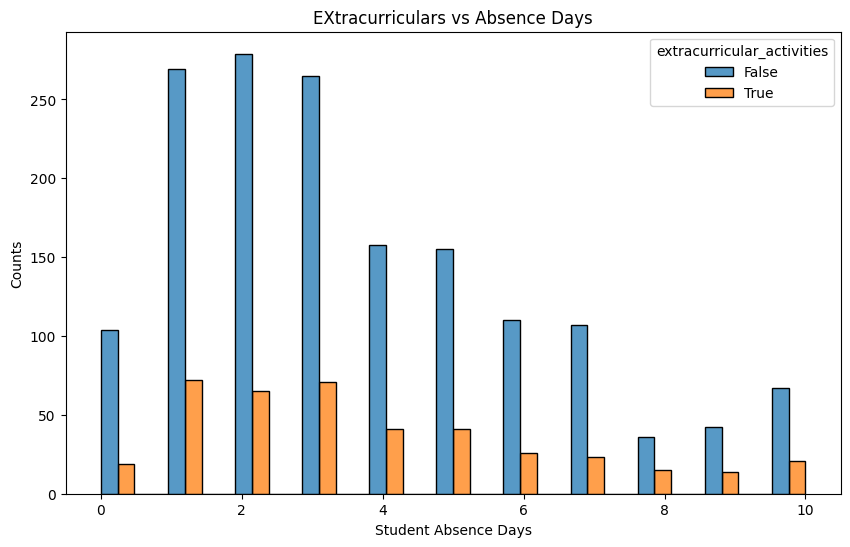

In [ ]:
display(student_df.groupby('extracurricular_activities')['absence_days'].value_counts(sort = False))

plt.figure(figsize=(10, 6))
sns.histplot (student_df, x = 'absence_days', hue = 'extracurricular_activities', multiple="dodge")
plt.xlabel("Student Absence Days")
plt.ylabel("Counts")
plt.title("EXtracurriculars vs Absence Days")
plt.show()

# High Level Analysis #5

**Null Hypothesis:** There is no relationship between student absence days and student GPA.

**Alternative Hypothesis** There is a relationship between student absence days and student GPA.

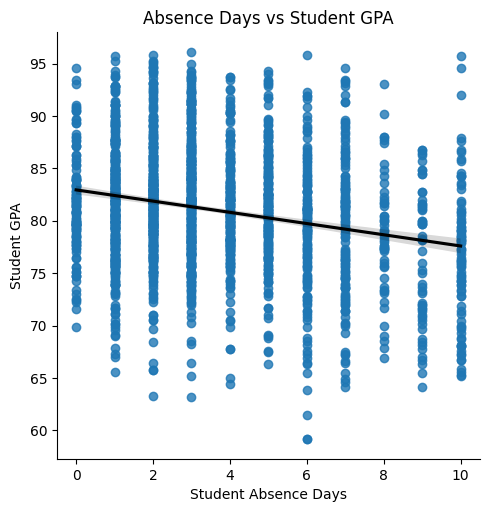

In [ ]:
sns.lmplot(student_df, x= 'absence_days', y='student_gpa', line_kws={'color': 'black'})
plt.xlabel("Student Absence Days")
plt.ylabel("Student GPA")
plt.title("Absence Days vs Student GPA")
plt.show()

In [ ]:
#There is a negative correlation between student absence days and student GPA. (r=-0.23, p≈0)
#This correlation make sense because we would expect that the more classes a student misses, the worse their performance in each class will be.
#In this case, a student is expected to see an academic performance drop of about ≈0.54 on their GPA for every absences.

absence_gpa_results = stats.linregress(student_df['absence_days'], student_df['student_gpa'])
print(absence_gpa_results)

LinregressResult(slope=-0.5351448342340487, intercept=82.94193053274205, rvalue=-0.23286803525673383, pvalue=4.91649144360287e-26, stderr=0.04999850889582486, intercept_stderr=0.22552320572224158)


# High Level Analysis #6

In [ ]:
df_binary = cat_df[['part_time_job', 'extracurricular_activities']].copy()
df_binary['part_time_job'] = [1 if x == True else 0 for x in df['part_time_job']]
df_binary['extracurricular_activities'] = [1 if x == True else 0 for x in df['extracurricular_activities']]

#one-hot encoding performed on gender and career_aspiration
df_dummies = pd.get_dummies(cat_df[['gender', 'career_aspiration']])

#Preprocessed data containing numeric values, binary values, and one-hot encoded values
df_processed = pd.concat([
    df_numeric,
    df_binary,
    df_dummies,
], axis = 1)

#Performing Z-score normalization on the data
df_preprocessed_norm = pd.concat([
    (df_numeric - df_numeric.mean())/df_numeric.std(),
    df_binary,
    df_dummies
], axis=1)


In [ ]:
#Perfrom k-means clustering with 3 clusters.
#One interesting observation we can make based on this analysis that is also shown in a previous analysis is that
#a higher weekly self study hours shows a better academic performance.
#In cluster 1, the self study hours is 26.8, and we can see that each individual subject scores are all above 85, while cluster 2 shows 4 hours of weekly self study, and the scores are much lower in comparison.

#Another interesting observation is that in cluster 2, we can see that the Business Owner career aspiration is abnormally high(0.679), compared to the other clusters and other career aspirations.
#It is also the case where there are more female students in cluster 2 than male students. This reflects the analysis done on Student Career Interest by Gender.

kmeans = KMeans(n_clusters=3, n_init='auto')
df_processed['cluster'] = kmeans.fit_predict(df_preprocessed_norm)
df_processed.groupby('cluster').mean().T

cluster,0,1,2
absence_days,2.720000,6.550351,3.114198
weekly_self_study_hours,17.507027,4.278689,26.990741
math_score,86.637838,69.473068,88.115741
history_score,79.994595,73.091335,85.584877
physics_score,79.352432,76.112412,87.611111
chemistry_score,78.070270,75.414520,85.760802
biology_score,74.729730,76.304450,88.666667
english_score,81.310270,75.281030,85.182099
geography_score,75.691892,80.934426,88.274691
part_time_job,0.096216,0.381733,0.098765
